## Udacity project
## Wrangle and analyze data

## Gathering & Assessing Data

Define
#Required imports

In [1]:
#code
import pandas as pd
import seaborn as sns
import requests
import tweepy
import os
import json
import time
import csv
import sys
import matplotlib.pyplot as plt
import re
import datetime
from tweepy import OAuthHandler
from IPython.display import Image
from functools import reduce
from datetime import datetime,timedelta
from collections import Counter
%matplotlib inline

Each df will be called to assess its content

Calling the first df

In [2]:
#Code
df_original = pd.read_csv("twitter-archive-enhanced-2.csv")

In [3]:
#test
df_original

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
#code
#Making a folder in the workspace
folder_name = 'image_predictions'
if not (os.path.exists(folder_name)):
    os.makedirs(folder_name)

url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


#Define

Calling the second df

In [5]:
#seperating on a tab
#Code
images_original = pd.read_table('image_predictions/image-predictions-3.tsv',
                       sep='\t')


In [6]:
#test
images_original

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
#code
# API secrets
consumer_key = 'H1yYKLS0rWsKTjs9pUE4g5865'
consumer_secret = 'kxpx0OHChSxZoC3KWDj8XHbMEWKrn6EDsuyTvMW9y7sZbcj9Aj'
access_token = '261335612-TY8tD8clRgmi6iweRTqLyvvEA9SFMTOEwzAmdD8P'
access_secret = '5Ay2OqqqXQFYBFEji2to18K7FXJWfgHY3EHYpnJjEr71M'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [8]:
%%time

#Define
#Getting tweets from Twitter using Twitter API.

#Code


counts = countf = 0
tweet_ids = list(df_original.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        print("success on: " + str(tweet))
        counts+=1
        
    except: 
        print("Error reading: " + str(tweet))
        countf+=1


success on: 892420643555336193
success on: 892177421306343426
success on: 891815181378084864
success on: 891689557279858688
success on: 891327558926688256
success on: 891087950875897856
success on: 890971913173991426
success on: 890729181411237888
success on: 890609185150312448
success on: 890240255349198849
success on: 890006608113172480
success on: 889880896479866881
success on: 889665388333682689
success on: 889638837579907072
success on: 889531135344209921
success on: 889278841981685760
success on: 888917238123831296
success on: 888804989199671297
success on: 888554962724278272
Error reading: 888202515573088257
success on: 888078434458587136
success on: 887705289381826560
success on: 887517139158093824
success on: 887473957103951883
success on: 887343217045368832
success on: 887101392804085760
success on: 886983233522544640
success on: 886736880519319552
success on: 886680336477933568
success on: 886366144734445568
success on: 886267009285017600
success on: 886258384151887873
succe

success on: 842163532590374912
success on: 842115215311396866
success on: 841833993020538882
success on: 841680585030541313
success on: 841439858740625411
success on: 841320156043304961
success on: 841314665196081154
success on: 841077006473256960
success on: 840761248237133825
success on: 840728873075638272
success on: 840698636975636481
success on: 840696689258311684
success on: 840632337062862849
success on: 840370681858686976
success on: 840268004936019968
success on: 839990271299457024
success on: 839549326359670784
success on: 839290600511926273
success on: 839239871831150596
success on: 838952994649550848
success on: 838921590096166913
success on: 838916489579200512
success on: 838831947270979586
success on: 838561493054533637
success on: 838476387338051585
success on: 838201503651401729
success on: 838150277551247360
success on: 838085839343206401
success on: 838083903487373313
success on: 837820167694528512
success on: 837482249356513284
success on: 837471256429613056
Error re

success on: 808344865868283904
success on: 808134635716833280
success on: 808106460588765185
success on: 808001312164028416
success on: 807621403335917568
success on: 807106840509214720
success on: 807059379405148160
success on: 807010152071229440
success on: 806629075125202948
success on: 806620845233815552
success on: 806576416489959424
success on: 806542213899489280
success on: 806242860592926720
success on: 806219024703037440
success on: 805958939288408065
success on: 805932879469572096
success on: 805826884734976000
success on: 805823200554876929
success on: 805520635690676224
success on: 805487436403003392
success on: 805207613751304193
success on: 804738756058218496
success on: 804475857670639616
success on: 804413760345620481
success on: 804026241225523202
success on: 803773340896923648
success on: 803692223237865472
success on: 803638050916102144
success on: 803380650405482500
success on: 803321560782307329
success on: 803276597545603072
success on: 802952499103731712
success 

success on: 773547596996571136
success on: 773336787167145985
success on: 773308824254029826
success on: 773247561583001600
success on: 773191612633579521
success on: 772877495989305348
success on: 772826264096874500
success on: 772615324260794368
success on: 772581559778025472
success on: 772193107915964416
success on: 772152991789019136
success on: 772117678702071809
success on: 772114945936949249
success on: 772102971039580160
success on: 771908950375665664
success on: 771770456517009408
success on: 771500966810099713
success on: 771380798096281600
success on: 771171053431250945
success on: 771136648247640064
success on: 771102124360998913
success on: 771014301343748096
Error reading: 771004394259247104
success on: 770787852854652928
success on: 770772759874076672
Error reading: 770743923962707968
success on: 770655142660169732
success on: 770414278348247044
success on: 770293558247038976
success on: 770093767776997377
success on: 770069151037685760
success on: 769940425801170949
su

success on: 742161199639494656
success on: 742150209887731712
success on: 741793263812808706
success on: 741743634094141440
success on: 741438259667034112
success on: 741303864243200000
success on: 741099773336379392
success on: 741067306818797568
success on: 740995100998766593
success on: 740711788199743490
success on: 740699697422163968
success on: 740676976021798912
success on: 740373189193256964
success on: 740365076218183684
success on: 740359016048689152
success on: 740214038584557568
success on: 739979191639244800
success on: 739932936087216128
success on: 739844404073074688
success on: 739623569819336705
success on: 739606147276148736
success on: 739544079319588864
success on: 739485634323156992
success on: 739238157791694849
success on: 738891149612572673
success on: 738885046782832640
success on: 738883359779196928
success on: 738537504001953792
success on: 738402415918125056
success on: 738184450748633089
success on: 738166403467907072
success on: 738156290900254721
success 

success on: 706291001778950144
success on: 706265994973601792
success on: 706169069255446529
success on: 706166467411222528
success on: 706153300320784384
success on: 705975130514706432
success on: 705970349788291072
success on: 705898680587526145
success on: 705786532653883392
success on: 705591895322394625
success on: 705475953783398401
success on: 705442520700944385
success on: 705428427625635840
success on: 705239209544720384
success on: 705223444686888960
success on: 705102439679201280
success on: 705066031337840642
success on: 704871453724954624
success on: 704859558691414016
success on: 704847917308362754
success on: 704819833553219584
success on: 704761120771465216
success on: 704499785726889984
success on: 704491224099647488
success on: 704480331685040129
success on: 704364645503647744
success on: 704347321748819968
success on: 704134088924532736
success on: 704113298707505153
success on: 704054845121142784
success on: 703774238772166656
success on: 703769065844768768
success 

success on: 686730991906516992
success on: 686683045143953408
success on: 686618349602762752
success on: 686606069955735556
success on: 686394059078897668
success on: 686386521809772549
success on: 686377065986265092
success on: 686358356425093120
success on: 686286779679375361
success on: 686050296934563840
success on: 686035780142297088
success on: 686034024800862208
success on: 686007916130873345
success on: 686003207160610816
success on: 685973236358713344
success on: 685943807276412928
success on: 685906723014619143
success on: 685681090388975616
success on: 685667379192414208
success on: 685663452032069632
success on: 685641971164143616
success on: 685547936038666240
success on: 685532292383666176
success on: 685325112850124800
success on: 685321586178670592
success on: 685315239903100929
success on: 685307451701334016
success on: 685268753634967552
success on: 685198997565345792
success on: 685169283572338688
success on: 684969860808454144
success on: 684959798585110529
success 

success on: 675707330206547968
success on: 675706639471788032
success on: 675534494439489536
success on: 675531475945709568
success on: 675522403582218240
success on: 675517828909424640
success on: 675501075957489664
success on: 675497103322386432
success on: 675489971617296384
success on: 675483430902214656
success on: 675432746517426176
success on: 675372240448454658
success on: 675362609739206656
success on: 675354435921575936
success on: 675349384339542016
success on: 675334060156301312
success on: 675166823650848770
success on: 675153376133427200
success on: 675149409102012420
success on: 675147105808306176
success on: 675146535592706048
success on: 675145476954566656
success on: 675135153782571009
success on: 675113801096802304
success on: 675111688094527488
success on: 675109292475830276
success on: 675047298674663426
success on: 675015141583413248
success on: 675006312288268288
success on: 675003128568291329
success on: 674999807681908736
success on: 674805413498527744
success 

success on: 670420569653809152
success on: 670417414769758208
success on: 670411370698022913
success on: 670408998013820928
success on: 670403879788544000
success on: 670385711116361728
success on: 670374371102445568
success on: 670361874861563904
success on: 670338931251150849
success on: 670319130621435904
success on: 670303360680108032
success on: 670290420111441920
success on: 670093938074779648
success on: 670086499208155136
success on: 670079681849372674
success on: 670073503555706880
success on: 670069087419133954
success on: 670061506722140161
success on: 670055038660800512
success on: 670046952931721218
success on: 670040295598354432
success on: 670037189829525505
success on: 670003130994700288
success on: 669993076832759809
success on: 669972011175813120
success on: 669970042633789440
success on: 669942763794931712
success on: 669926384437997569
success on: 669923323644657664
success on: 669753178989142016
success on: 669749430875258880
success on: 669684865554620416
success 

In [9]:
#Printing percentage of successful tweets
print(counts/(counts+countf)*100,"%")

98.93887945670629 %


In [10]:
#Code
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent =4,
              ensure_ascii = False)

In [11]:
#Code
tweets_df_original = pd.read_json('tweet_json.txt',orient='index')

#Define

Assessment of Twitter Data, the third df

In [12]:
#test
tweets_df_original

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2359,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,453,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,119,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,110,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,39,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,265,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,125,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,96,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,122,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,51,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1101,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,753,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,404,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,216,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,263,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,120,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,104,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,52,0,NaN,"<a href=""http

Checking each df's columns and checking if there are missing data

In [13]:
#test
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#test
images_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#test
tweets_df_original.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

Normally one change the code lots of times while developing the whole program so it's handy to keep the original data stored to apply a new-developed code on them

In [16]:
# Making a copy of the dataframes 
#Code
df = df_original.copy()
images = images_original.copy()
tweets_df = tweets_df_original.copy()

#Define

In [17]:
#Checking whether there are duplicates in the data
#Code
print(sum(df.duplicated()))
print(sum(images.duplicated()))
print(sum(tweets_df['id'].duplicated()))

0
0
0


As it can be seen, there are no duplicates in the data

In [18]:
#Test
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
# 4 Quality issues
df['name'].replace('the', 'None', inplace=True)
df['name'].replace("an",'None', inplace=True)
df['name'].replace("a",'None', inplace=True)
df['name'].replace("none",'None', inplace=True)

In [20]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
#Test
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
#Tidyness issue no.1
df['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

In [24]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                         23

#Define

This is the first technincal mistake I spotted in the Data

In [25]:
#Quality issues 5-8
#change columns to string
df.name = df.name.astype(str) 
df.doggo = df.doggo.astype(str) 
df.floofer = df.floofer.astype(str) 
df.pupper = df.pupper.astype(str) 

In [26]:
#Removing retweets from the df
df = df[df.retweeted_status_id.isnull()]
df = df[df.retweeted_status_user_id.isnull()]
df = df[df.retweeted_status_timestamp.isnull()]

Checking the datatype of tweet_id column in the first df

In [27]:
#Code
type(df['tweet_id'].iloc[0])

numpy.int64

In [28]:
df.tweet_id = df.tweet_id.astype(str) 

In [29]:
#Test
type(df['tweet_id'].iloc[0])

str

I'm trying to refine the id column among the 3 dataframes to unite them into a single dataframe

In [30]:
#Code
tweets_df.rename(columns={'id': 'tweet_id'}, inplace=True)

In [31]:
#Test
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
tweet_id                         2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [32]:
#Code
tweets_df.tweet_id = tweets_df.tweet_id.astype(str)

In [33]:
#Code
type(df['tweet_id'].iloc[0])

str

In [34]:
#Test
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
tweet_id                         2331 non-null object
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2

In [35]:
images.tweet_id = images.tweet_id.astype(str)

In [36]:
type(images['tweet_id'].iloc[0])

str

## Visualizing Data

Getting the rows which have Names of dogs not equal to '

In [37]:
#Code
y = df[df.name != 'None']

In [38]:
#Test
y

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NoneNoneNoneNone
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NoneNoneNoneNone
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggoNoneNoneNone
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None,NoneNoneNoneNone
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None,NoneNoneNoneNone


<function matplotlib.pyplot.show(*args, **kw)>

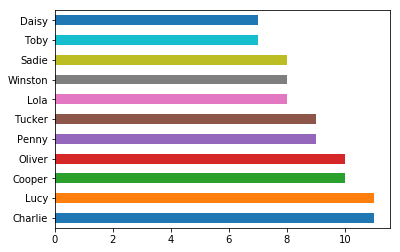

In [39]:
#Displaying most common names of Dogs
#Code
y = y.groupby('name').filter(lambda y: len(y) >= 7 )
y['name'].value_counts().plot(kind = 'barh')
plt.show

In [40]:
#Tidyness issue no.2
df = pd.merge(df, images, on='tweet_id', how='inner')

In [41]:
#Code
df = pd.merge(df, tweets_df, on='tweet_id', how='inner')

In [42]:
#Test
df

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,text_y,truncated,user
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,3679,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'contributors_enabled': False, 'created_at': ..."
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,7664,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'contributors_enabled': False, 'created_at': ..."
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,8265,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1,"{'contributors_enabled': False, 'created_at': ..."
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,NaN,NaN,NaN,2767,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,1,"{'contributors_enabled': False, 'created_at': ..."
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,NaN,NaN,NaN,16764,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,1,"{'contributors_enabled': False, 'created_at': ..."
5,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,NaN,NaN,NaN,3822,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,1,"{'contributors_enabled': False, 'created_at': ..."
6,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,NaN,NaN,NaN,6514,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,1,"{'contributors_enabled': False, 'created_at': ..."
7,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,...,NaN,NaN,NaN,3973,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,0,"{'contributors_enabled': False, 'created_at': ..."
8,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,...,NaN,NaN,NaN,4733,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,1,"{'contributors_enabled': False, 'created_at': ..."
9,888917238123831296,NaN,NaN,2017-07-23 00:22:39 

Text(0.5,0.98,'Is there a correlation between the favorite & retweet counts?')

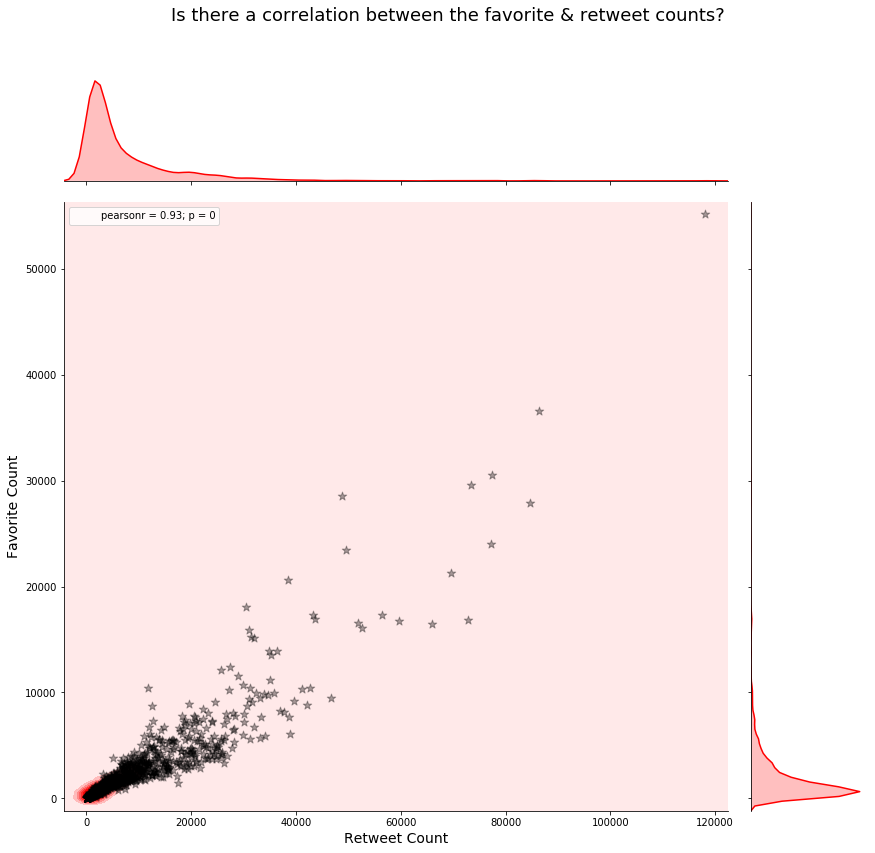

In [43]:
#Code
#Second Visualization
g = sns.jointplot(x="favorite_count", 
                  y="retweet_count", 
                  data=df, 
                  color="red",
                  kind="kde", 
                  size=12)

g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="*",
             alpha=0.35)

g.set_axis_labels("Retweet Count", "Favorite Count",fontsize = 14)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('Is there a correlation between the favorite & retweet counts?',
                 fontsize=18)

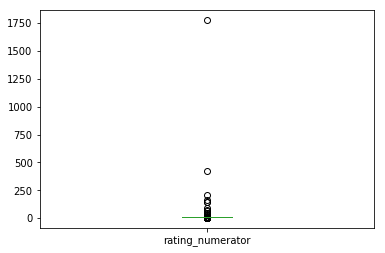

In [44]:
#Code
#Third visualization
df.rating_numerator.plot.box()


In [45]:
# Saving files in the workspace
folder_name = 'Final_Documents'
if not(os.path.exists(folder_name)):
    os.makedirs(folder_name)
    
df.to_csv('Final_Documents/first_df_master.csv')
images.to_csv('Final_Documents/images_master.csv')
tweets_df.to_csv('Final_Documents/twitter_query_master.csv')
df.to_csv('Final_Documents/final_master.csv')


In [46]:
# Using the updated dataframes
df_final = pd.read_csv("Final_Documents/final_master.csv")
image_pred_df = pd.read_csv("Final_Documents/image_prediction_master.csv")

In [47]:
#Test
df_final.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,text_y,truncated,user
0,0,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,NaN,NaN,NaN,3679,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'contributors_enabled': False, 'created_at': ..."
1,1,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,NaN,NaN,NaN,7664,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'contributors_enabled': False, 'created_at': ..."
2,2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,NaN,NaN,NaN,8265,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1,"{'contributors_enabled': False, 'created_at': ..."
3,3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,NaN,NaN,NaN,2767,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,1,"{'contributors_enabled': False, 'created_at': ..."
4,4,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,...,NaN,NaN,NaN,16764,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,1,"{'contributors_enabled': False, 'created_at': ..."


In [48]:
#Test
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 59 columns):
Unnamed: 0                       1297 non-null int64
tweet_id                         1297 non-null int64
in_reply_to_status_id_x          15 non-null float64
in_reply_to_user_id_x            15 non-null float64
timestamp                        1297 non-null object
source_x                         1297 non-null object
text_x                           1297 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null float64
expanded_urls                    1297 non-null object
rating_numerator                 1297 non-null int64
rating_denominator               1297 non-null int64
name                             1297 non-null object
doggo                            1297 non-null object
floofer                          1297 non-null object
pupper                           1297 non

In [49]:
#Code
df_final.tweet_id = df_final.tweet_id.astype(str)

In [50]:
#Test
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 59 columns):
Unnamed: 0                       1297 non-null int64
tweet_id                         1297 non-null object
in_reply_to_status_id_x          15 non-null float64
in_reply_to_user_id_x            15 non-null float64
timestamp                        1297 non-null object
source_x                         1297 non-null object
text_x                           1297 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null float64
expanded_urls                    1297 non-null object
rating_numerator                 1297 non-null int64
rating_denominator               1297 non-null int64
name                             1297 non-null object
doggo                            1297 non-null object
floofer                          1297 non-null object
pupper                           1297 no

References:

https://en.wikipedia.org/wiki/WeRateDogs    
https://www.geeksforgeeks.org/python-os-makedirs-method/

https://realpython.com/twitter-bot-python-tweepy/

https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/

Calculating Cell Execution Time in Jupyter Notebook

https://www.youtube.com/watch?v=oS5PahnKf_E

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html
https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

The previous review from Udacity reviewer helped me